# Ens'IA - Session 1 - Introduction to machine learning

In [ ]:
import keras
from keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

To introduce you to the main notions of Machine Learning, we will present two basic algorithms: KNN and K-MEANS.

They will be applied to the CIFAR 10 dataset, a dataset of 50,000 images belonging to 10 different image classes.

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Let's observe the dimensions of the dataset
print("Shape of the training samples: {}".format(x_train.shape));
print("Shape of the training targets: {}".format(y_train.shape));

# CIFAR-10 image classes
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 2s 0us/step
Shape of the training samples: (50000, 32, 32, 3)
Shape of the training targets: (50000, 1)


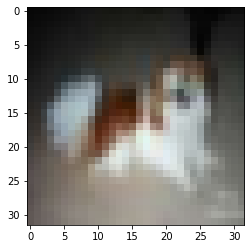

-> class 5 (dog)


In [ ]:
# Let's visualize an example and its class
img_index = np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[img_index])
plt.show()

class_indx = y_train[img_index, 0]
print("-> class {} ({})".format(class_indx, classes[class_indx]))

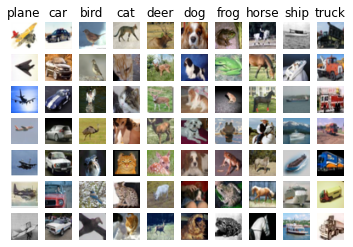

In [ ]:
# Grid of examples of each class

n_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    # Randomly select class y samples
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)

    # Display theses examples in columns
    for i, idx in enumerate(idxs):
        plt_idx = i * n_classes + y + 1
        plt.subplot(samples_per_class, n_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

K-NN (K Nearest Neighbor) is an algorithm that consists in finding in the training dataset the K images that resembles the most the image we want to classify.

To compute the resemblance between two images we can, as a first approximation, simply consider their Euclidean distance (L2 norm). On the K images found, we then look at which class is the most present: we can thus decide the class of our test image.

In [ ]:
# Resize the images by flattening them to facilitate their manipulation
# We want the following shapes:

# x_train: (50000, 32 * 32 * 3)
# x_test: (10000, 32 * 32 * 3)
# y_train: (training sample count, )
# y_test:  (testing sample count, )
x_train = 
x_test = 
y_train = 
y_test = 

SyntaxError: ignored

In [ ]:
# Parameter value
k = 20

Using all 50 000 training images to classify the 10 000 test images would take .. well .. *some time*. Therefore we're going to use subsets of those:

In [ ]:
n_imgs_train = 5000
n_imgs_test = 1000

In [ ]:
# --- Bruteforce method ---
predictions = np.empty((n_imgs_test, ))
for id_img_test, img_test in enumerate(x_test[:n_imgs_test]):
  # The k_nearest array contains the classes of the k nearest images distances
  # contains the distances between the test image and the k nearest
  k_nearest, distances = np.full((k, ), -1), np.full((k, ), float("+inf"))

  # We want to fill k_nearest with the classes of the k training images that
  # are closest to img_test (w.r. to the euclidean distance).
  # Feel free to check out how to compute the euclidean norm of an image
  # in the NumPy documentation :)
  for id_img_train, img_train in enumerate(x_train[:n_imgs_train]):
    # TODO
    pass

  # Counts the number of items of each class in k_nearest, and puts in
  # predictions that which appears most
  predictions[id_img_test] = np.argmax(np.bincount(k_nearest))
  
  print("Classified image {}/{} ".format(id_img_test + 1, n_imgs_test))

However this code is quite painful to write and read. To simplify and make it
run faster, we'll use the famous package **scikit-learn**.
This package really is *the* toolbox for ML developpers. It includes a lot of ready-to-use learning algorithms. We'll let you read about the KNN implentation by yourself [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).
**Once more, we strongly advise against using all samples from the training and test sets.**

In [ ]:
n_imgs_train = 2000
n_imgs_test = 500

In [ ]:
x_test = x_test[:n_imgs_test]
y_test = y_test[:n_imgs_test]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model of parameter k = 7
# TODO !

 # Trains the model
 # Ready up about the fit() and score() methods !
neigh.fit(x_train[:n_imgs_train], y_train[:n_imgs_train])

In [ ]:
# Makes the predictions for the test set and evaluates the accuracy
print(neigh.score(x_test,y_test)) 

Let's visualize a few examples of predicted classes:

In [ ]:
from itertools import product

In [ ]:
n_cols = 4
fig, axes = plt.subplots(nrows=n_cols, ncols=n_cols, figsize=(8, 8))
samples = x_test[:n_cols ** 2]
predictions = neigh.predict(samples)

# Reshapes the samples into the image shape
samples = samples.reshape(samples.shape[0], 32, 32, 3)

for i, j in product(range(n_cols), range(n_cols)):
    axes[i, j].imshow(samples[i * n_cols + j])
    axes[i, j].axis("off")
    axes[i, j].set_title(classes[predictions[i * n_cols + j]])

fig.suptitle("A few predictions...")
plt.show(fig)

We obtained a score of 0.29 (this may vary with the amount of training and test samples you used). Moreover you've likely noticed that the algorithm requires quite some time (imagine using the whole datasets !).
We've evaluated the model for $k= 7$, but what's the optimal value for $k$ ?
$k$ is called an **hyperparameter**: it's a value on which the algorithm depends but which is *not* learned.
We'll let you estimate the best value for $k$ on your own:


In [ ]:
results = []
for k in range(1, 16):
    # TODO:
    # Train a KNN model of parameter k
    # Evaluate its performance on a subset of x_test
    # Save the accuracy in results
    pass

plt.plot(list(range(1, 16)), results, "-+")
plt.xlabel("K")
plt.ylabel("Accuracy")

The K-Means method is a **data clustering** algorithm, among the fundamentals of *unsupervised learning*. This means that the algorithm **does not require any target data**.

The algorithm tries to split the samples into separate groups, which can then be interpreted as classes. It starts by taking $K$ random images. Each of those original images is the *representative* of its class. Then for any training image $I$ we find the *representative* $R$ that is closest to $I$, and place $I$ in the class represented by $R$.
After all training images have been placed in a class, we replace the representatives by the **mean** of their classes.
We repeat this process until a convergence criterion is reached (for example, that the representatives have barely evolved between two successive steps).

In [ ]:
K_VALUE = 10

min_val = 1
# Initializes the K representatives
K_mean = [255 * np.random.rand(32*32*3) for _ in range(K_VALUE)]
# Precedent values of the representatives
K_save = [255 * np.random.rand(32*32*3) for _ in range(K_VALUE)]

def nearest_K(image):
  """
  Returns the class whose representative is closest to the image.
  """
  min_dist, min_k = float("+inf"), None
  for id_K, K_point in enumerate(K_mean):
    dist = np.linalg.norm(image - K_point)
    if dist < min_dist:
      min_dist, min_k = dist, id_K
  return min_k

def mean_point(k, tab):
  """
  Replaces the representative of the k_th class with the mean
  of tab. tab should be a list of images.
  """
  if tab != []:
    K_mean[k] = np.mean(tab, axis=0)
    
def stop_convergence():
  """
  Evaluates whether we should stop iterating.
  """
  for k in range(10):
    # We might want a less strict criterion !
    if np.array_equal(K_mean[k], K_save[k]):
      return True
  return False

#KMEAN
iteration = 0
while not stop_convergence():
  iteration += 1
  K_nearest = [[] for _ in range(K_VALUE)]

  for id_image, image in enumerate(x_train):
    K_nearest[nearest_K(image)].append(id_image)

  for k in range(K_VALUE):
    K_save[k] = K_mean[k]
    mean_point(k, K_nearest[k])
  print(iteration) 

Let's try with a built-in function written by some serious Data Scientists:

In [ ]:
 from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10);
kmeans.fit(x_train);
kmeans.score(x_test,y_test)